# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


In [3]:

#Checking the API response

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city="faya"
city_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(city_url + city).json()
response


{'coord': {'lon': 42.4509, 'lat': 18.3851},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 14.29,
  'feels_like': 13.58,
  'temp_min': 14.29,
  'temp_max': 15.06,
  'pressure': 1018,
  'humidity': 69,
  'sea_level': 1018,
  'grnd_level': 790},
 'visibility': 10000,
 'wind': {'speed': 3.07, 'deg': 73, 'gust': 5.18},
 'clouds': {'all': 98},
 'dt': 1698440792,
 'sys': {'type': 1,
  'id': 7396,
  'country': 'SA',
  'sunrise': 1698462472,
  'sunset': 1698503997},
 'timezone': 10800,
 'id': 110690,
 'name': 'Faya',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url + city).json()
        city_weather =response['main']['temp']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dalandzadgad
Processing Record 2 of Set 1 | north shore
Processing Record 3 of Set 1 | enewetak
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | kingston
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | tingo maria
Processing Record 10 of Set 1 | ebon
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | nuuk
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | bikenibeu village
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | telsiai
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | nova sintra
Processing Record 22 of Set 1 | port mathurin
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dalandzadgad,43.5708,104.4250,6.45,33,23,2.70,MN,1698440793
1,north shore,-36.8000,174.7500,13.04,62,100,2.24,NZ,1698440793
2,enewetak,11.3474,162.3373,28.43,74,47,5.16,MH,1698440793
3,puerto natales,-51.7236,-72.4875,4.60,73,18,8.39,CL,1698440499
4,kingston,17.9970,-76.7936,28.53,82,40,7.20,JM,1698440080


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dalandzadgad,43.5708,104.4250,6.45,33,23,2.70,MN,1698440793
1,north shore,-36.8000,174.7500,13.04,62,100,2.24,NZ,1698440793
2,enewetak,11.3474,162.3373,28.43,74,47,5.16,MH,1698440793
3,puerto natales,-51.7236,-72.4875,4.60,73,18,8.39,CL,1698440499
4,kingston,17.9970,-76.7936,28.53,82,40,7.20,JM,1698440080


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

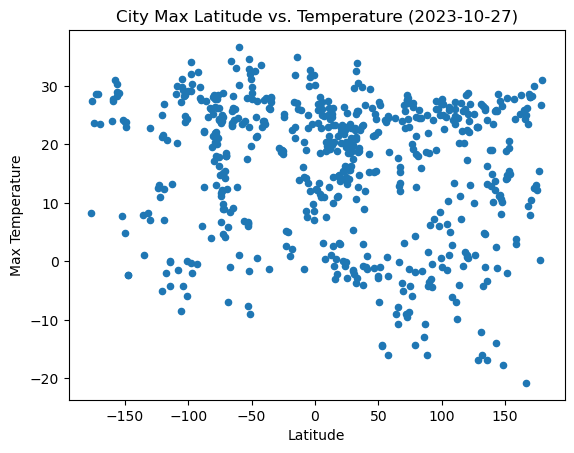

In [32]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot(
                x='Lng',
                y='Max Temp',
                kind="scatter",
                xlabel=("Latitude"),
                ylabel=("Max Temperature") ,
                title="City Max Latitude vs. Temperature (2023-10-27)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

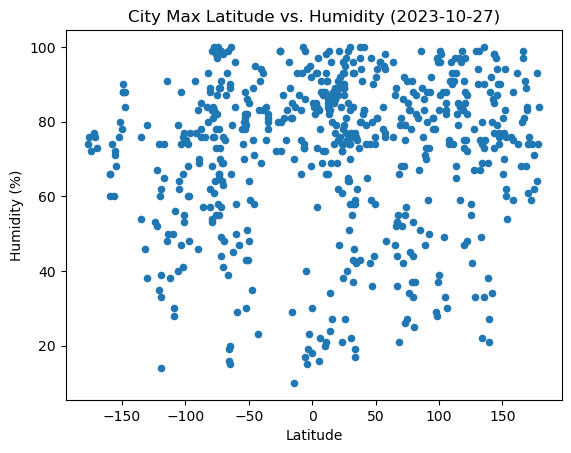

In [31]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(
                x='Lng',
                y='Humidity',
                kind="scatter",
                xlabel=("Latitude"),
                ylabel=("Humidity (%)") ,
                title="City Max Latitude vs. Humidity (2023-10-27)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

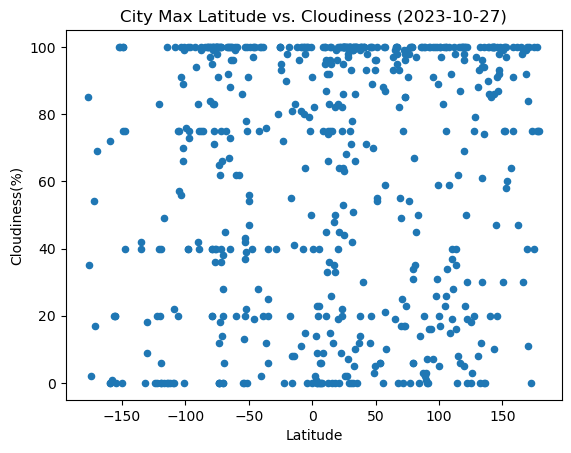

In [30]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot(
                x='Lng',
                y='Cloudiness',
                kind="scatter",
                xlabel=("Latitude"),
                ylabel=("Cloudiness(%)") ,
                title="City Max Latitude vs. Cloudiness (2023-10-27)")



# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

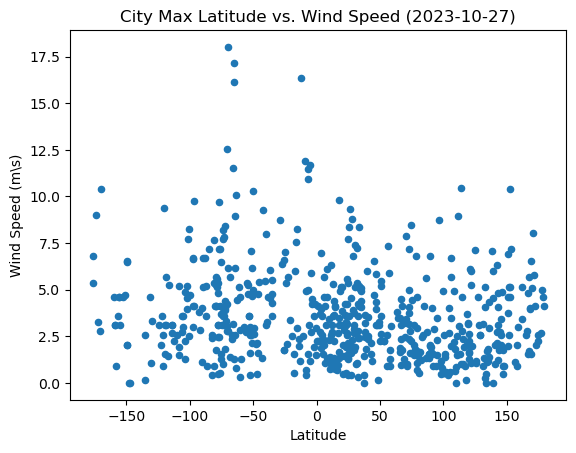

In [29]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot(
                x='Lng',
                y='Wind Speed',
                kind="scatter",
                xlabel=("Latitude"),
                ylabel=("Wind Speed (m\s)") ,
                title="City Max Latitude vs. Wind Speed (2023-10-27)")



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]
southern_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=pd.DataFrame(northern_df)
# Display sample data

northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dalandzadgad,43.5708,104.4250,6.45,33,23,2.70,MN,1698440793
2,enewetak,11.3474,162.3373,28.43,74,47,5.16,MH,1698440793
4,kingston,17.9970,-76.7936,28.53,82,40,7.20,JM,1698440080
9,ebon,4.5820,168.6964,28.58,68,92,3.94,MH,1698440795
10,broome,42.2506,-75.8330,24.21,55,40,4.12,US,1698440796


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=pd.DataFrame(southern_df)
# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,north shore,-36.8000,174.7500,13.04,62,100,2.24,NZ,1698440793
3,puerto natales,-51.7236,-72.4875,4.60,73,18,8.39,CL,1698440499
5,port-aux-francais,-49.3500,70.2167,3.14,81,49,7.89,TF,1698440794
6,ushuaia,-54.8000,-68.3000,5.81,87,75,5.66,AR,1698440794
7,hermanus,-34.4187,19.2345,14.74,69,96,5.14,ZA,1698440795


In [16]:
#Checking that the all cities were captured
northern_hemi_df.count()+southern_hemi_df.count()


City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       600
Date          602
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.847


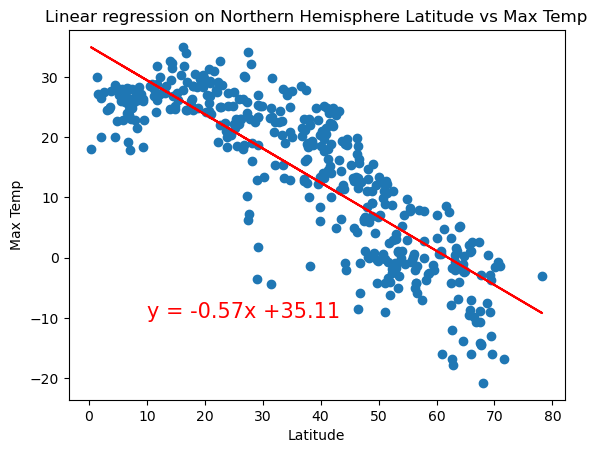

In [17]:
# Linear regression on Northern Hemisphere
x_values=pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(northern_hemi_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear regression on Northern Hemisphere Latitude vs Max Temp')
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

The r-value is: 0.737


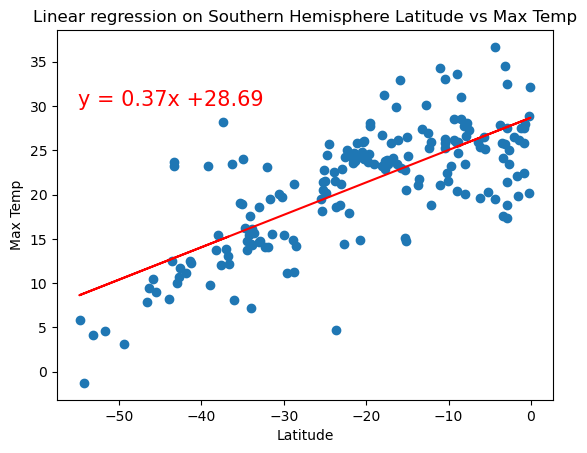

In [18]:
# Linear regression on Southern Hemisphere
x_values=pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(southern_hemi_df['Max Temp']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Linear regression on Southern Hemisphere Latitude vs Max Temp')
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [19]:
print("Northern:The regression displays a negative correlation,The temperature seems to decrease as we move away from the equator.")
print("Southern:The regression displays a positive correlation,The temperature seems to increase as we closer to the equator.")


Northern:The regression displays a negative correlation,The temperature seems to decrease as we move away from the equator.
Southern:The regression displays a positive correlation,The temperature seems to increase as we closer to the equator.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.177


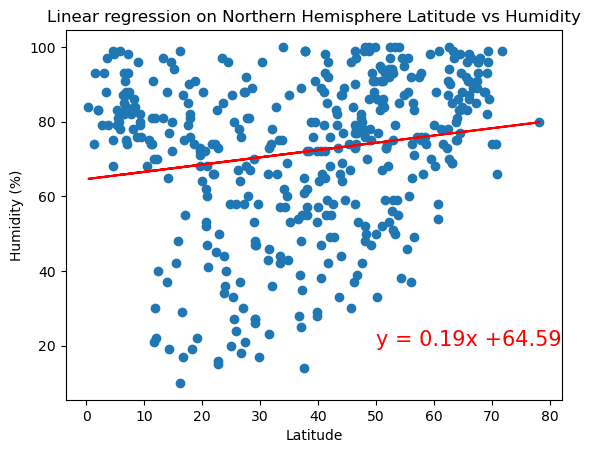

In [20]:
# Northern Hemisphere
x_values=pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(northern_hemi_df['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear regression on Northern Hemisphere Latitude vs Humidity')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

The r-value is: 0.122


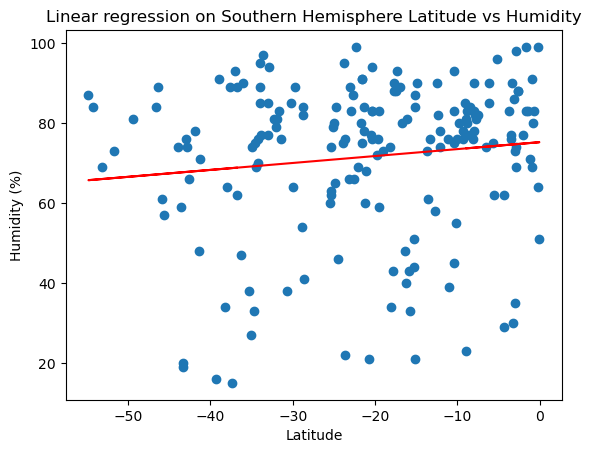

In [21]:
# Southern Hemisphere
x_values=pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(southern_hemi_df['Humidity']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear regression on Southern Hemisphere Latitude vs Humidity')
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [22]:
print("The regression does not display much of a correlation between the data sets.")

The regression does not display much of a correlation between the data sets.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1843


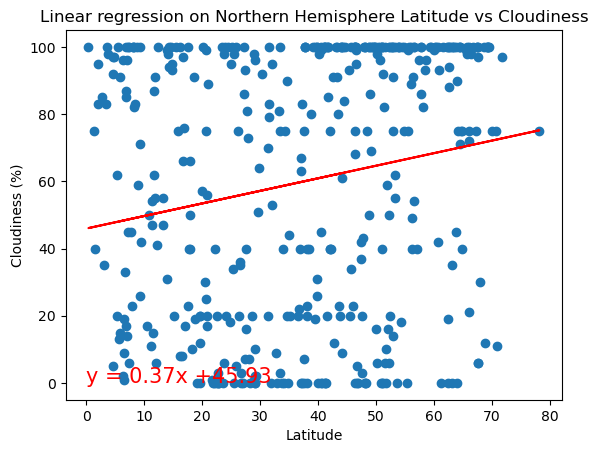

In [23]:
# Northern Hemisphere
x_values=pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Linear regression on Northern Hemisphere Latitude vs Cloudiness')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
rvalue_print=round(rvalue,4)
print(f"The r-value is: {rvalue_print}")
plt.show()

The r-value is: -0.042


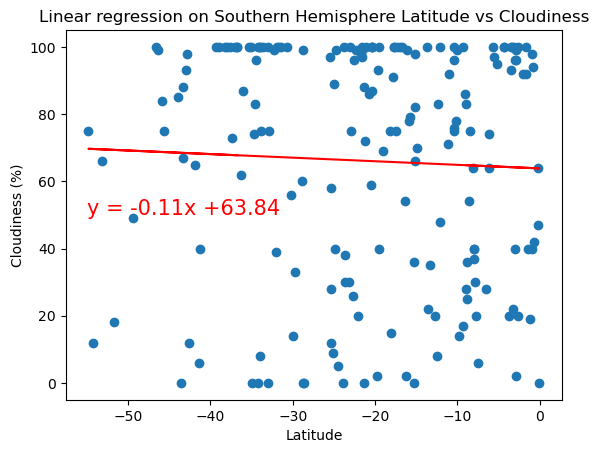

In [24]:
# Southern Hemisphere
x_values=pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Linear regression on Southern Hemisphere Latitude vs Cloudiness')
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [25]:
print("The regression does not display much of a correlation between the data sets.")


The regression does not display much of a correlation between the data sets.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.124


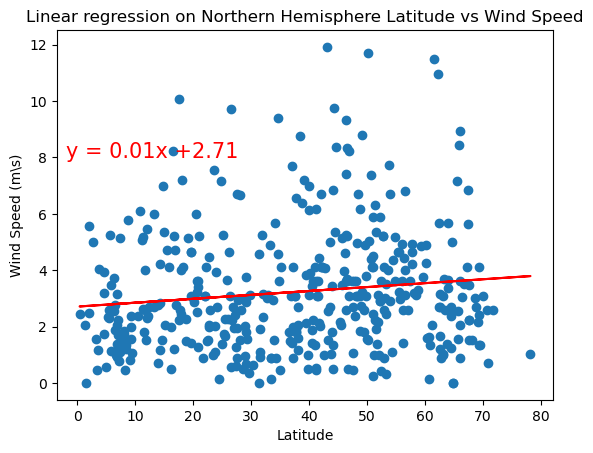

In [26]:
# Northern Hemisphere
x_values=pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m\s)')
plt.title('Linear regression on Northern Hemisphere Latitude vs Wind Speed')
plt.annotate(line_eq,(-2,8),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

The r-value is: -0.412


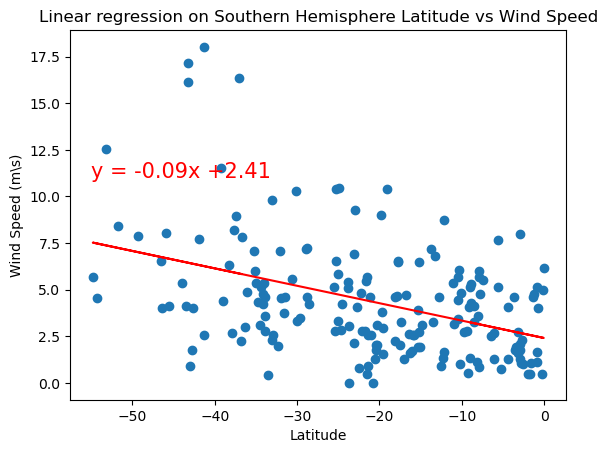

In [27]:
# Southern Hemisphere
x_values=pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values=pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m\s)')
plt.title('Linear regression on Southern Hemisphere Latitude vs Wind Speed')
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
rvalue_print=round(rvalue,3)
print(f"The r-value is: {rvalue_print}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [28]:
print("The regression does not display much of a correlation between the data sets.")


The regression does not display much of a correlation between the data sets.
